This article aims at introducing decision trees; a popular building block of highly praised models such as xgboost. A decision tree is simply a set of cascading questions. When you get a data point (i.e. set of features and values), you use each attribute (i.e. a value of a given feature of the data point) to answer a question. The answer to each question decides the next question. At the end of this sequence of questions, you will end up with a probability of the data point belonging to each class.<br>
### Why decision trees?
Decision trees are great for several reasons. But as with any model, the true power comes when you use a model in a suitable context. Remember,<br>
<i>garbage in, garbage out!</i><br>Decision trees are great in the sense that<br><ul><li>They are easily <b>interpretable</b> and follows a similar pattern to human thinking. In other words, you can explain a decision tree as a set of questions/business rules.</li>
    <li>Prediction is <b>fast.</b> It’s a set of comparison operations until you reach a leaf node</li>
    <li>Can be adapted to deal with <b>missing data</b> without imputing data</li></ul>
### Primer on decision trees:
As I said earlier, a decision tree is basically set of cascading questions (formed to a shape of a tree). The questions test whether a feature of the data satisfies a certain condition (e.g. is Outlook == Sunny ?). Let’s flesh this out a little bit. For that let’s assume a typical weather dataset (I personally don’t like the weather dataset — too mainstream, so I’ll switch to something a bit more exciting later).<br><center><img src="https://miro.medium.com/max/914/1*8__PlTNgTd22adkH-9oFzQ.png"></center><br>Say we have the above dataset, and would like to predict if we would play golf or not given the weather. The decision tree for this problem might look like the one below.<br><center><img src="https://miro.medium.com/max/797/1*Qqr1ZsGqOISKv-dQR0N1rA.png"><h6>An example decision tree. Round nodes denote decision nodes, where square nodes denote leaf nodes</h6></center><br> 
### Components of a decision tree
Let me give you a brief anatomy lesson of a decision tree. The tree has decision nodes (round), decisions (edges), and leaf/prediction nodes (square). You first start off with a decision node (e.g. Outlook) and depending on the answer, you might have a leaf node, or another decision node (e.g. Windy). A decision tree could go on for an arbitrary number of decision nodes. However, each branch should end with a leaf node.<br>
### Predicting with a decision tree
Now say you have a new datapoint, which you would like to predict the label for.<br><i>Outlook = Sunny, Temperature = Hot, Humidity = Normal, Windy = True</i><br>In order to predict, you start from the top of the tree and traverse deeper and deeper using the attributes (i.e. feature values) to make decisions along the tree, until you reach a leaf node. This process is depicted below.<br><center><img src="https://miro.medium.com/max/797/1*rmV_02XSjCpCaj11wZJDCQ.png"></center><br>Guess you’re not playing Golf.<br>
### Building a tree
Of course there is a more important question that still remains.<br>
<h3>How can we arrive at this tree?</h3><br>
More importantly,<br>
<h3>How can we decide the best feature partition data at a given depth?</h3><br>
There are several different different algorithm used to generate trees such as,<br>
<ul><li><b>CART</b> (Classification and regression trees) — Uses <u>Gini coefficient</u> to decide partition feature</li>
    <li><b>ID3</b> (Uses information gain - discussed later, to decide the partition feature, and <b>not designed to deal with continuous features</b>)</li>
    <li><b>C4.5</b> (Works similar to ID3 by using information gain to split data. However C4.5 <b>can handle continuous features,</b> as well as <b>can work with missing data</b>)</li>
</ul><br>
<b>Entropy</b>: It is used to measure the impurity or randomness of a dataset. Imagine choosing a yellow ball from a box of just yellow balls (say 100 yellow balls). Then this box is said to have 0 entropy which implies 0 impurity or total purity.<br>Now, let’s say 30 of these balls are replaced by red and 20 by blue. If we now draw another ball from the box, the probability of drawing a yellow ball will drop from 1.0 to 0.5. Since the impurity has increased, entropy has also increased while purity has decreased. Shannon’s entropy model uses the logarithm function with base 2 (log2(P(x)) to measure the entropy because as the probability P(x) of randomly drawing a yellow ball increases, the result approaches closer to binary logarithm 1 as shown in the graph below.<br><center><img src="https://miro.medium.com/max/1050/1*2HDboZpOA6O2UV0moi_rCg.png"></center><br>When a target feature contains more than one type of element (balls of different colors in a box), it is useful to sum up the entropies of each possible target value and weigh it by the probability of getting these values assuming a random draw. This finally leads us to the formal definition of Shannon’s entropy which serves as the baseline for the information gain calculation:<br><center><img src="https://miro.medium.com/max/1050/1*Mag0PsD0O6QeNSXBb6BTzQ.png"></center><br>
Where P(x=k) is the probability that a target feature takes a specific value, k.
Logarithm of fractions gives a negative value and hence a ‘-‘ sign is used in entropy formula to negate these negative values. The maximum value for entropy depends on the number of classes.<br>
<ul><li>2 classes: Max entropy is 1</li>
<li>4 Classes: Max entropy is 2</li>
<li>8 Classes: Max entropy is 3</li>
<li>16 classes: Max entropy is 4</li></ul>
<b>Information Gain:</b> To find the best feature which serves as a root node in terms of information gain, we first use each descriptive feature and split the dataset along the values of these descriptive features and then calculate the entropy of the dataset. This gives us the remaining entropy once we have split the dataset along the feature values. Then, we subtract this value from the originally calculated entropy of the dataset to see how much this feature splitting reduces the original entropy which gives the information gain of a feature and is calculated as:<br><center><img src="https://miro.medium.com/max/1050/1*5Bzoc6n44YXGAZtmEWCi9Q.png"></center><br>
The feature with the largest information gain should be used as the root node to start building the decision tree.
ID3 algorithm uses information gain for constructing the decision tree.<br>
<b>Gini Index:</b> It is calculated by subtracting the sum of squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.<br><center><img src="https://miro.medium.com/max/1050/1*bOOmVYHSwWcPoXZKSLc2Xw.png"></center><br>A feature with a lower Gini index is chosen for a split.<br>The classic CART algorithm uses the Gini Index for constructing the decision tree.<br>
Let’s now move onto solving a more exciting fictional problem. We want to find an evil King who is terrifying streets of TreeLand.<br>

### Find the disguised king on the streets
<i>(Data and features)</i>
From this section onward, I am going to explain decision trees with a story of the king of TreeLand who loved fooling locals by disguising himself on the streets. This was annoying because whenever someone unintentionally treat the king badly, he would be punished. People were quite vexed, and one wise man (let’s call him John) stepped up and said he can solve this in 10 days!<br>
John assumed several characteristics of the king that cuts a distinctive figure when he is in public. The features are,<br><ul>
    <li>Comes out of the castle</li>
    <li>Walks slowly</li>
    <li>Eats 5 or more times daily</li>
    <li>Has a gold tooth</li>
</ul>
John started observing people and creating a dataset (one datapoint per person) along with the target variable (i.e. whether the person was actually the king or not). He has the following observations. Unfortunately this dataset came at the cost of suffering of five people.<br><center><img src="https://miro.medium.com/max/1050/1*jjRM1VktgWM-6AniM4B2Fw.png"></center><br>With this dataset, John did the following. He wrote down each feature against the target variable, and highlighted each entry according to the following logic:<br><ul><li>Green — If the attribute matched the corresponding label</li>
    <li>Red — If the attribute did not match the corresponding label</li></ul><br><center><img src="https://miro.medium.com/max/980/1*MBs1rABSMNjPC6LXiHhUnw.png"><h6>John’s whiteboard</h6></center><br>Now, looking at the above tables, we can get a sense of which features contribute the most to correctly predicting the King. For example, the following diagram summarises the observations from the above tables.<br><center><img src="https://miro.medium.com/max/1037/1*ysQhZdYxUkes5PEkQ9g6sA.png"><h6>Summary of the observations from the highlighted tables</h6></center><br>Well instincts is not good enough to call you solved a problem. You need quantifiable metrics to show that these features are powerful. In fact, half of the citizens in TreeLand are machine learning engineers! This is where the information gain comes in.<br>

### Information gain: How much more information gained by splitting data?
We already discussed that the basic idea behind a tree is to ask a question (i.e. test data against an attribute) and split the data depending on the answer (e.g. True or False). Information gain measures how predictable the data became (or how much more information gained) by splitting the data according to the answer provided at the decision node. Put on your science goggles, time to formalise. Information gained using feature F on data Y is defined by:<br>
IG(Y, F) = H(Y)-H(Y|F)<br>
where Y is the target variable and F is some feature (e.g. Gold Tooth). So the more powerful a feature is, the more information is gained by splitting the data on that feature. H(Y) is the entropy of the Y and H(Y|F) is the conditional entropy of Y conditioned on F (discussed soon). In code, computing information gain looks as follows.<br>
def compute_infogain(data, feature, label_col_name):<br>
    &emsp;&emsp;&emsp;"""<br>
    &emsp;&emsp;&emsp;This function computes the information gain<br>
    &emsp;&emsp;&emsp;IG(Y|X) = H(Y) - H(Y|X)<br>
    &emsp;&emsp;&emsp;data: A pd.DataFrame container all data<br>
    &emsp;&emsp;&emsp;grouped_data: A groupby object that groups Play_GOLF value counts by some feature<br>
    &emsp;&emsp;&emsp;"""<br>
<br>
    &emsp;&emsp;&emsp;grouped_data = data.groupby(feature)[label_col_name].value_counts()<br>
    <br>
    &emsp;&emsp;&emsp;h_y = compute_entropy(data[label_col_name])<br>
    &emsp;&emsp;&emsp;h_y_given_x = 0<br>
    &emsp;&emsp;&emsp;#print(grouped_data)<br>
    &emsp;&emsp;&emsp;for k in grouped_data.keys():<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# k is a tuple, which has the feature index followed by label index (groupby object)<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;k_f, k_y = k<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;h_y_given_x += (grouped_data[k_f][k_y].sum()*1.0/data.shape[0])* compute_entropy_with_counts(grouped_data[k_f])<br>
    <br>
    &emsp;&emsp;&emsp;return h_y - h_y_given_x<br>
Let us now look at what entropy and conditional entropy is.<br>
### Entropy and Conditional Entropy
Entropy measures how many bits are required to transform data. So the more predictable your data, the lesser the number of bits required. In contrast, the less predictable your data, the more bits you need. This is written down as follows:<br><center><img src="https://miro.medium.com/max/452/1*9JcoMlpuatFwEb_fa5cdYw.png"></center><br>where (y in Y) denotes the unique outcomes in Y (e.g. Is King = True or False in our example). You can implement this in Python quite easily.<br>
def compute_entropy(ser):<br>
    &emsp;&emsp;&emsp;"""<br>
    &emsp;&emsp;&emsp;This function computes the entropy<br>
    &emsp;&emsp;&emsp;"""<br>
    &emsp;&emsp;&emsp;total = 0<br>
    &emsp;&emsp;&emsp;counts = ser.value_counts()<br>
    &emsp;&emsp;&emsp;for k in ser.unique():<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;#print(k)<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;total += -(counts[k]*1.0/ser.shape[0])*np.log2(counts[k]*1.0/ser.shape[0])<br>
<br>        
    &emsp;&emsp;&emsp;return total<br>
### Entropy in layman’s terms
<i>Let’s understand entropy more intuitively. Say the King decided to never fool the locals in the first place, and John decided to collect data to solve this problem. He would have had an entropy of zero. Why? Because the label is 100% predictable (i.e. it is always 0). But, in our data, the entropy is at its highest (i.e. 1), because there is a equal chance of a person being a king or not.<br>Imagine two people (John and Lisa) talking over the phone. Every time John calls Lisa, Lisa has to say if it was the king or not for each datapoint (i.e. 10 times) without any additional information. Below I depict how the conversation will go down for different entropy values.<br><center><img src="https://miro.medium.com/max/1050/1*nlpB2msUQ8Nf9KYXGMxIjw.png"><h6>Difference of different entropy values</h6></center></i>
### Conditional entropy in layman’s terms
<i>This sets up the ground nicely to explain what conditional entropy is (i.e. H(Y|F). Imagine that now, for each datapoint, John tells whether the person had a Gold Tooth or not. Then, depending on the feature value (i.e. F), Lisa has to predict if that was the king or not. If you look at the table below, the data is now more predictable than not having any features.<br></i><center><img src="https://miro.medium.com/max/477/1*NIhtzQziCeX_bADDfZ-Qsw.png"><h6>From Jonh’s whiteboard</h6></center><br>In summary, what information gain does is that,<br>
<i>it measure the difference in predictability before and after providing information about the feature F.</i><br>To remind ourselves again, here’s the formula for the information gain.<br>
IG(Y, F) = H(Y)-H(Y|F)<br>
### Meanwhile in TreeLand
<i>(Building the tree)</i><br>
John computes the information gain for both <b>Castle</b> and <b>Gold Tooth</b> and find out that they are much better than <b>Slow</b> and <b>Greedy.</b> Then John first picks the feature <b>“Castle”.</b><br><center><img src="https://miro.medium.com/max/1050/1*YfSEm0-itEcxKNaux6GMEQ.png"><h6>Tree with the feature “Castle”</h6></center><br>He’s happy with the left side. He thinks, “4/6 classification is not bad”. Given that he only has 10 datapoints, we’ll cut him some slack. But the results from the right side are poor (i.e. it’s 50% True or 50% False). He needs to improve the results, so he goes ahead and try to split the remainder on the left using the feature that gives the highest information gain, which turns out to be the <b>“Gold Tooth”</b> feature, and obtains the following.<br><center><img src="https://miro.medium.com/max/1050/1*sDehHhK55WqlqohqK2BcRw.png"></center><br>So there you go! John has found the secret sauce! This is in fact how the <b>ID3 algorithm</b> works. More formally you would have the following pseudocode.<br><center><img src="https://miro.medium.com/max/1050/1*KOzG9J5TaBB_ORvGLPLTDA.png"><h6>Pseudocode</h6></center><br>The most important function in this code would be build_tree which in reality would look like this.<br>

In [1]:
def build_tree(data_to_split, label_column, features, best_feature=None, value=None, depth=0, min_leaf_count=3, ig_tol=1e-10, max_depth=5):
    """
    This Function computes the sub tree recursively. This is a more general tree model
    where there can be arbitrary number of children for a given node
    :param data_to_split: pd.DataFrame
    :param label_column: str (Column name of Y)
    :param features: list of str (Column names of X)
    :param best_feature: str (previous best feature fed recursively to build the tree)
    :param value: int (previous value of the feature fed recursively)
    :param depth: int (previous depth of the tree fed recursively)
    :param min_leaf_count: int (minimum number of datapoints in a leaf)
    :param ig_tol: float (information gain tolerance to make a split)
    :param max_depth: int (maximum depth allowed in the tree)
    """
    
    # Sanity check (ig_tol needs to be > 0). Otherwise
    # data having the same label before and after the split 
    # (information gain =0) will create many useless branches
    if ig_tol<=0.0:
        print('ig_tol needs to be > 0')
        return
    
    # Termination condition 1 (minimum count on leaf)
    if data_to_split.shape[0]<=3:
        print('Too little data. Terminating growth ...')
        children = [LeafNode(data_to_split, label_column)]
        return DecisionNode(best_feature, value, data_to_split, children=children)
    
    # Finding the next best feature to split the data on
    next_best_feature, infogain = find_best_feature(data_to_split, features, label_column)
    feature_unique_values = list(set(data_to_split[next_best_feature].tolist()))
    
    # Termination condition 2 (minimum information gain)
    if infogain < ig_tol or next_best_feature is None:
        print('Too little information gain. Terminating growth ...')
        children = [LeafNode(data_to_split, label_column)]
        return DecisionNode(best_feature, value, data_to_split, children=children)
    
    next_depth = depth + 1
    
    # Termination condition 3 (depth)
    if depth >= max_depth:
        print('Too deep. Terminating growth ...')
        children = [LeafNode(data_to_split, label_column)]
        return DecisionNode(best_feature, value, data_to_split, children=children)
    
    print('Choosing {} as the best feature with {} information gain at depth {}'.format(next_best_feature, infogain, next_depth))
    # Partition the data according to the selected features values
    parts_dict = partition_data(next_best_feature, feature_unique_values, data_to_split)
    
    # For each partition create a child, where child recursively calls build_tree
    children = []
    
    for attr, p in parts_dict.items():
        print('\tCreating child node {}={} having {} data points...'.format(next_best_feature, attr, p.shape[0]))
        children.append(build_tree(p, label_column, features, next_best_feature, attr, next_depth, min_leaf_count, ig_tol, max_depth))
        
    # Return the node
    return DecisionNode(best_feature, value, data_to_split, children=children)

### Treeland citizens can relax again
So after John showed what he came up with, people were impressed. But John knew that more data would not only improve his model, but also validate his findings. So he asked others to help him collect more data. But little did he know, he’ll run into problems doing so.<br>
### The tree is grew too much
<i>(Overfitting and regularisation)</i><br>
So John managed to get several people onboard with his idea to augment the dataset and improve the model. They managed to get the dataset up to 50 datapoints. So after collecting data, dreaming about a better more robust model, John created a new tree. Here’s the tree he got.<br><center><img src="https://miro.medium.com/max/1050/1*EzL06ci2bdOAp59Zflb4Rg.png"><h6>New decision tree</h6></center><br>This tree instantly raised red flags in John’s mind. The tree is way too complicated to solve this problem. It should be enough to have only two or three features in a simple tree structure. So what happened here? This is called <b>overfitting!</b> John did not use any regularisation to control the complexity of the tree, leading to yielding a non-generalising and uninterpretable tree model that defeats the purpose.<br>
### Let’s pivot back and correct John’s mistakes
There are several ways you can combat overfitting in tree models. I will be discussing three methods in this section. They are:<br><ul>
    <li>Making sure each leaf node has at least <b>n</b> datapoints</li>
    <li>Making sure the depth of the tree does not exceed <b>d</b></li>
    <li>Making sure the information gain is greater than a threshold to make a split</li></ul>
Making sure that each leaf node has at least n number of datapoints in a leaf node is important. Because, you can build the world’s perfect tree (heavily overfitted) to any training set, by having a single datapoint assigned to each leaf node in the tree. Therefore, making sure there is at least n number of datapoints (e.g. say 5% of the data) leads to more generalised tree models.<br>
Making sure that the tree does not exponentially grow, will again guard us against overfitting. In this method, we are basically limiting the number of questions we can ask to predict the class of a model, which leads to choosing the best few questions to ask, rather than asking all possible questions in the world.<br>
The last one, making sure that the information gain is above a threshold should make sense. Because, what’s the point of growing the tree, if we’re not getting a benefit from it?<br>
So, after revising these techniques and applying them to the model, John came up with the following model, which is more explainable.<br><center><img src="https://miro.medium.com/max/819/1*VQtVIDspkr6NOuAMGSt7wQ.png"><h6>Regularised tree</h6></center><br>I am not going to reiterate about predicting with trees, as the process is quite straight forward. This can be implemented in Python using recursive functions as below.<br>

In [2]:
def predict_datapoint(test_point, my_tree):
    """
    This function computes the prediction for a given data point
    """
    
    for c in my_tree.children:
        # If we came to a leaf node, return the prediction given by the leaf node
        if isinstance(c, LeafNode):
            return c.prediction
        
        # If the feature value matches the value of the data point, keep diving
        if test_point[c.feature] == c.value:
            return predict_datapoint(test_point, c)

With this we conclude the adventure in TreeLand. In conclusion, John collected data, built an initial model using information gain to decide valuable features. Ran into trouble with overfitting and solved it using regularisation. The good news is that, they have learnt to avoid king treating the wrong way using this model John developed. So they lived happily ever after!<br>
### Working with continuous values
So far, we limited ourselves to only looking at discrete variables. But there’s so much you can do only with discrete variables. The interesting problems usually have a mix of both continuous and discrete variables. So how can we use continuous variables in decision trees? There are two popular ways.<br>
<ul><li>Discretize the continuous feature by binning the range of a continuous feature to equal bins</li>
    <li>Use <b>“minimal entropy partitioning”</b>[2] to find a split in the continuous feature</li></ul><br>

### Minimal entropy partitioning
The minimal entropy partitioning (MEP) works as follows.<br>
<ul><li>You first nominate a set of cut points depending on the range the data spreads within (e.g. Cut the range at T locations equally spread)</li>
    <li>Then for each cut point, compute the weighted sum of entropy of the label Y</li>
    <li>Pick the cut point, that gives the minimum entropy</li></ul>

### Wrap up
In this article we discussed decision trees in great detail. Decision trees is a popular machine learning model, because they are more interpretable (e.g. compared to a neural network) and usually gives good performance, especially when used with ensembling (bagging and boosting).<br>
We first briefly discussed the functionality of a decision tree while using a toy weather dataset as an example. Then we jumped to a more lively problem, which was to identify if the annoying King of TreeLand is terrifying the streets. We saw how John used information gain to identify features that can help to identify the King and subsequently built a tree using those features. Afterwards, we saw how problems such as “overfitting” arose as the dataset grew larger. We also discussed how overfitting can be prevented using various regularisation methods (e.g. limiting the maximum depth of the tree). Finally we concluded the adventure in TreeLand and did a quick side tour to see how continuous features can be handled in decision trees.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
foo = pd.read_csv('car_evaluation.csv', header=None)

In [6]:
foo.shape

(1728, 7)

In [7]:
foo.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Renaming the columns to make them more understandable
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
foo.columns = col_names
foo.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


In [10]:
foo.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       buying  maint  doors  persons  lug_boot  safety  class
0      False  False  False    False     False   False  False
1      False  False  False    False     False   False  False
2      False  False  False    False     False   False  False
3      False  False  False    False     False   False  False
4      False  False  False    False     False   False  False
...      ...    ...    ...      ...       ...     ...    ...
1723   False  False  False    False     False   False  False
1724   False  False  False    False     False   False  False
1725   False  False  False    False     False   False  False
1726   False  False  False    False     False   False  False
1727   False  False  False    False     False   False  False

[1728 rows x 7 columns]>

In [11]:
#Frecuency distribution of values in variable
for col in col_names:
    print(foo[col].value_counts())

vhigh    432
low      432
med      432
high     432
Name: buying, dtype: int64
vhigh    432
low      432
med      432
high     432
Name: maint, dtype: int64
3        432
5more    432
2        432
4        432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
#Frecuency of a particular variable. Eg - class
foo['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [13]:
#Define X and y variable to train and test
X = foo.drop(['class'], axis=1)
y = foo['class']

In [14]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state = 42)

In [15]:
X_train.shape , X_test.shape

((1157, 6), (571, 6))

In [16]:
#Feature Engineering - TRansforming raw data into useful features that help us to understand our model better and increase its predictive power.
#First let's check the data types of variables again.
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [17]:
#Now we will encode categorical variables
#For that, let's import category encoders
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [19]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [22]:
#Decision Tree Classifier with criterion Gini index
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
#fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
#Predict the test set result with gini index
y_pred_gini = clf_gini.predict(X_test)

In [25]:
#Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [26]:
#Compare train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [28]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

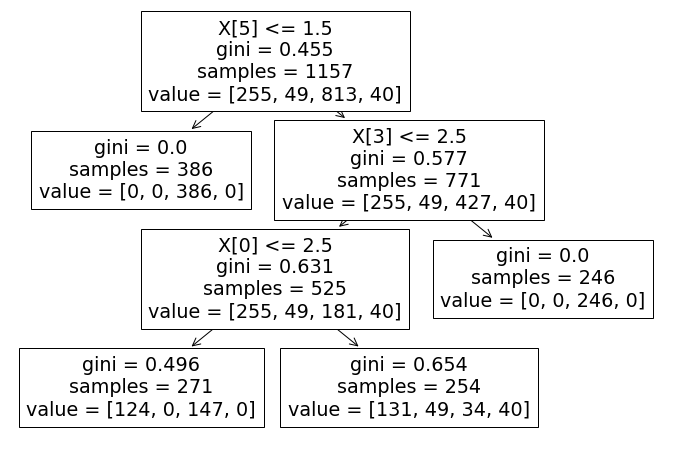

In [29]:
#Visualizing decision-trees
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [30]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)
graph = graphviz.Source(dot_data)
print(graph)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<safety &le; 1.5<br/>gini = 0.455<br/>samples = 1157<br/>value = [255, 49, 813, 40]<br/>class = unacc>, fillcolor="#85c2ef"] ;
1 [label=<gini = 0.0<br/>samples = 386<br/>value = [0, 0, 386, 0]<br/>class = unacc>, fillcolor="#399de5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<persons &le; 2.5<br/>gini = 0.577<br/>samples = 771<br/>value = [255, 49, 427, 40]<br/>class = unacc>, fillcolor="#bddef6"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<buying &le; 2.5<br/>gini = 0.631<br/>samples = 525<br/>value = [255, 49, 181, 40]<br/>class = unacc>, fillcolor="#f9e4d4"] ;
2 -> 3 ;
4 [label=<gini = 0.496<br/>samples = 271<br/>value = [124, 0, 147, 0]<br/>class = unacc>, fillcolor="#e0f0fb"] ;
3 -> 4 ;
5 [label=<gini = 0.654<br/>samples = 254<br/>value = [131, 49, 34, 40]<br/>class = unacc>, fillcolor="#f5

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571

